<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/prueba_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRUEBA DE FRECUENCIAS

##SIMULACIÓN

**Estudiante:** Karla Michelle Soriano Sánchez

**Objetivo**: Elaborar un código en Python que implemente la Prueba de Frecuencias para evaluar si un conjutno de números pseudoaleatorios sigue una distribución uniforme en el intervalo (0,1)

##Fundamento teorico

La prueba de frecuencias fromad parte de las prueba de bondad de ajustes y se utiliza para verificar si un conjunto de datos (muestra) sigue una distribución uniforme $U(0,1)$.
La idea principal:
1.  dividir el intervalo (0,1) en k clases iguales
2. contar cuántos valores caen en cada clase, es decir calculare la frecuencia observada.
3.  comparar con la
frecuencia esperada si la muestra fuera uniforme.


Definiremos la prueba de hipotesis de la siguiente manera:

- *Hipotesis nula*
$H_0$: Los datos (muestra) provienen de una distribución uniforme $U(0,1)$

- *Hipotesis alternativa*  $H_1$: Los datos (muestra) NO provienen de una distribución uniforme $U(0,1)$




El estadisitco de prueba es:



In [133]:
import numpy as np #utilizada para calcular la media
from scipy.stats import chi2 #utilizada para calcular el valor critico
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [134]:
#son los datos proporcionados en la imagen

data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

n=len(data)
print(f"El número total de datos es: {n}")

El número total de datos es: 100


In [136]:
def prueba_frecuencias(datos, alpha):
    """
    Implementa la prueba de frecuencias utilizando intervalos
    de amplitud 0.2 en (0,1).
    """
    """
    Implementa la prueba de frecuencias para evaluar la uniformidad
    de un conjunto de números en (0,1).

    Parámetros:
    datos -- lista o arreglo de valores en (0,1)
    k     -- número de intervalos/classes
    alpha -- nivel de significancia

    Retorna:
    - tabla: DataFrame con FO, FE y (FO-FE)^2/FE
    - chi_calculado: valor calculado de chi-cuadrada
    - chi_critico: valor crítico de la distribución Chi-cuadrada
    """




    n = len(datos)

    # Definición manual de los intervalos
    bins = [0,0.2,0.4,0.6,0.8,1.0]

    # Clasificación de cada dato en su intervalo correspondiente
    indices = np.digitize(datos, bins, right=False)

    # Conteo de frecuencias observadas
    conteos = [(indices == i).sum() for i in range(1, len(bins))]

    k = len(conteos)

    # Frecuencia esperada
    fe = n / k

    # Cálculo parcial del estadístico
    chi_parcial = [(fo - fe)**2 / fe for fo in conteos]

    # Estadístico total
    chi_calculado = sum(chi_parcial)

    # Valor crítico
    gl = k - 1
    chi_critico = chi2.ppf(1 - alpha, gl)

    # Construcción de tabla
    tabla = pd.DataFrame({
        "Intervalo": ["[0.0,0.2)","[0.2,0.4)","[0.4,0.6)",
                      "[0.6,0.8)","[0.8,1.0)"],
        "FO": conteos,
        "FE": [fe]*k,
        "(FO-FE)^2/FE": chi_parcial
    })

    return tabla, chi_calculado, chi_critico

In [137]:
def frecuencias(datos, fe, alpha):

    bins = [0,0.2,0.4,0.6,0.8,1.0]

    indices = np.digitize(datos, bins, right=False)
    conteos = [(indices == i).sum() for i in range(1, len(bins))]

    k = len(conteos)

    chi_parcial = [(fo - fe)**2 / fe for fo in conteos]
    chi_calculado = sum(chi_parcial)

    gl = k - 1
    chi_critico = chi2.ppf(1 - alpha, gl)

    # Construimos la tabla como lista de listas
    tabla = []

    intervalos_texto = ["[0, 0.2]",
                        "[0.2, 0.4]",
                        "[0.4, 0.6]",
                        "[0.6, 0.8]",
                        "[0.8, 1.0]"]

    for i in range(k):
        fila = [intervalos_texto[i],
                conteos[i],
                fe,
                round(chi_parcial[i],4)]
        tabla.append(fila)

    # Imprimir tabla con formato bonito
    print(tabulate(tabla,
                   headers=["Intervalo","Frec. Observada",
                            "Frec. Esperada","(fo-fe)^2/fe"],
                   tablefmt="fancy_grid"))

    print("\nChi-cuadrada calculado:", round(chi_calculado,4))
    print("Chi-cuadrada crítico:", round(chi_critico,4))

    if chi_calculado < chi_critico:
        print("\nNo se rechaza H0: La muestra proviene de U(0,1)")
    else:
        print("\nSe rechaza H0: La muestra no proviene de U(0,1)")



In [138]:
alpha = 0.05

tabla, chi_calc, chi_crit = prueba_frecuencias(data, alpha)


print(tabulate(tabla,
               headers=["Intervalo","FO","FE","(FO-FE)^2/FE"],
               tablefmt="fancy_grid"))

╒════╤═════════════╤══════╤══════╤════════════════╕
│    │ Intervalo   │   FO │   FE │   (FO-FE)^2/FE │
╞════╪═════════════╪══════╪══════╪════════════════╡
│  0 │ [0.0,0.2)   │   21 │   20 │           0.05 │
├────┼─────────────┼──────┼──────┼────────────────┤
│  1 │ [0.2,0.4)   │   22 │   20 │           0.2  │
├────┼─────────────┼──────┼──────┼────────────────┤
│  2 │ [0.4,0.6)   │   19 │   20 │           0.05 │
├────┼─────────────┼──────┼──────┼────────────────┤
│  3 │ [0.6,0.8)   │   23 │   20 │           0.45 │
├────┼─────────────┼──────┼──────┼────────────────┤
│  4 │ [0.8,1.0)   │   15 │   20 │           1.25 │
╘════╧═════════════╧══════╧══════╧════════════════╛


In [139]:
print("χ² calculado:", round(chi_calc,4))
print("χ² crítico:", round(chi_crit,4))

if chi_calc < chi_crit:
    print("No se rechaza H₀ → Uniforme.")
else:
    print("Se rechaza H₀ → No uniforme.")

χ² calculado: 2.0
χ² crítico: 9.4877
No se rechaza H₀ → Uniforme.


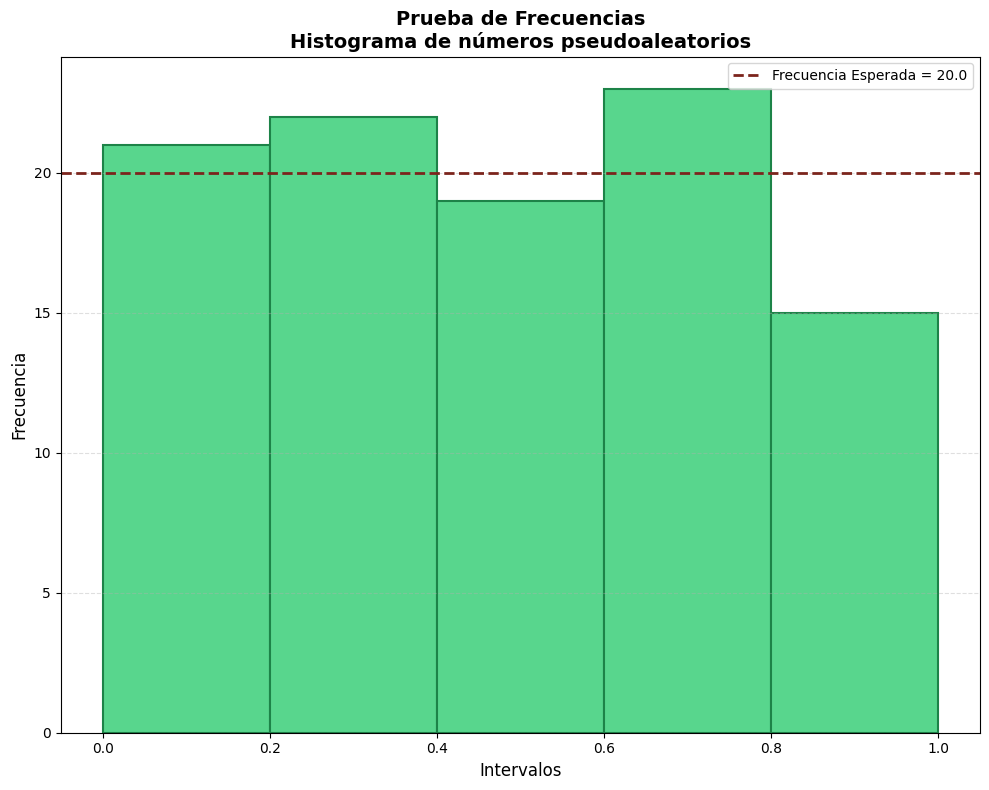

In [147]:
bins = [0,0.2,0.4,0.6,0.8,1.0]

plt.figure(figsize=(10,8))

# Histograma
plt.hist(data,
         bins=bins,
         color="#58D68D",
         edgecolor="#1D8348",
         linewidth=1.5)

# Línea de frecuencia esperada
fe = len(data)/5
plt.axhline(fe,
            color="#7B241C",
            linestyle="--",
            linewidth=2,
            label=f"Frecuencia Esperada = {fe}")

# Personalización
plt.title("Prueba de Frecuencias\nHistograma de números pseudoaleatorios",
          fontsize=14,
          fontweight="bold")

plt.xlabel("Intervalos", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.legend()
plt.tight_layout()

plt.show()

## Interpretación del histograma

Se observa que las frecuencias en cada intervalo son relativamente
equilibradas y se mantienen cercanas a la frecuencia esperada (línea roja).
No se aprecia concentración excesiva en algún subintervalo, lo cual
es consistente con el resultado obtenido en la prueba χ².

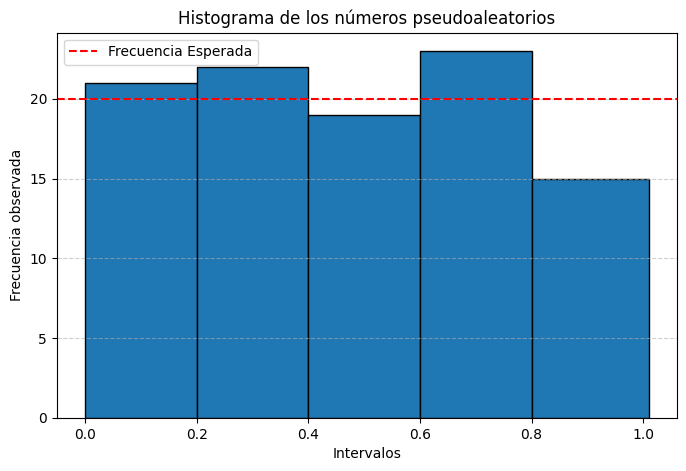

In [141]:
plt.figure(figsize=(8,5))

plt.hist(data, bins=bins, edgecolor='black')

plt.title("Histograma de los números pseudoaleatorios")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia observada")
plt.axhline(fe,color="red", linestyle="--", label="Frecuencia Esperada")
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()